

# Analysing Time To Close Food Claims

## Background

Vivendo is a fast food chain in Brazil with over 200 outlets<br>
Customers often claim compensation from the company for food poisoning<br>
The legal team processes these claims. The legal team has offices in four locations<br>
The legal team wants to improve how long it takes to reply to customers and close claims<br>
The head of the legal department wants a report on how each location differs in the time it takes to close claims<br>

## Task 1: Data Cleaning


In [2]:
import pandas as pd
food = pd.read_csv("Files/food_claims_2212.csv", index_col="claim_id")
food.head()

,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
claim_id,,,,,,,
1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [5]:
# To get an overview of the values I also returned the following summaries:

food.head()

,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
claim_id,,,,,,,
1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [8]:
# To find missing data:

food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time_to_close         2000 non-null   int64  
 1   claim_amount          2000 non-null   object 
 2   amount_paid           1964 non-null   float64
 3   location              2000 non-null   object 
 4   individuals_on_claim  2000 non-null   int64  
 5   linked_cases          1974 non-null   object 
 6   cause                 2000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 125.0+ KB


In [11]:
# Check that all numeric columns are showing up 

food.describe()

# I expected to see "claim_amount" here too so we will need to format this column next

,time_to_close,amount_paid,individuals_on_claim
count,2000.00000,1964.000000,2000.000000
mean,185.56800,21541.975183,8.049500
std,49.16339,12530.156509,4.087347
min,76.00000,1516.720000,1.000000
25%,158.00000,10995.950000,4.000000
50%,179.00000,20105.700000,8.000000
75%,204.00000,30709.350000,12.000000
max,518.00000,52498.750000,15.000000


In [13]:
# First, I removed the first 3 characters:

food["claim_amount"] = food["claim_amount"].str[3:]
food["claim_amount"].head()

claim_id
1    74.55
2    37.83
3     47.2
4    06.28
5     20.6
Name: claim_amount, dtype: object

In [16]:
# Then I changed the column type:

food["claim_amount"] = pd.to_numeric(food["claim_amount"])
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time_to_close         2000 non-null   int64  
 1   claim_amount          2000 non-null   float64
 2   amount_paid           1964 non-null   float64
 3   location              2000 non-null   object 
 4   individuals_on_claim  2000 non-null   int64  
 5   linked_cases          1974 non-null   object 
 6   cause                 2000 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 125.0+ KB


In [18]:
# Finally I rounded the values to 2 decimal places:

food["claim_amount"].round(decimals = 2)
food["amount_paid"].round(decimals = 2)

food.head()

,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
claim_id,,,,,,,
1,317,74.55,51231.37,RECIFE,15,False,unknown
2,195,37.83,42111.30,FORTALEZA,12,True,unknown
3,183,47.20,23986.30,SAO LUIS,10,True,meat
4,186,6.28,27942.72,FORTALEZA,11,False,meat
5,138,20.60,16251.06,RECIFE,11,False,vegetable


#### a. State whether the values match the description given in the table above.

In [21]:
# Check the "location" column has only the 4 locations listed

food["location"].value_counts()

RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64

In [23]:
# Check the "cause" column has only the 3 choices (meat, vegetables, unknown) listed

food["cause"].value_counts()

meat          943
unknown       713
vegetable     314
VEGETABLES     16
 Meat          14
Name: cause, dtype: int64

In [25]:
# What I did to correct the formatting errors in "cause":

food["cause"] = food["cause"].str.lower()
food["cause"] = food["cause"].str.replace("vegetables", "vegetable")
food["cause"] = food["cause"].str.strip()
food["cause"].value_counts()

meat         957
unknown      713
vegetable    330
Name: cause, dtype: int64

#### b. State the number of missing values in the columns

In [27]:
food.isna().sum()

time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

In [31]:
# What I did to correct these null values:

food['amount_paid'] = food['amount_paid'].fillna(food['amount_paid'].median())
food['linked_cases'] = food['linked_cases'].fillna('False')
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time_to_close         2000 non-null   int64  
 1   claim_amount          2000 non-null   float64
 2   amount_paid           2000 non-null   float64
 3   location              2000 non-null   object 
 4   individuals_on_claim  2000 non-null   int64  
 5   linked_cases          2000 non-null   object 
 6   cause                 2000 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 125.0+ KB


In [33]:
food.isna().sum()

time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64

## Task 2: Visualizing Data

#### Create a visualization that shows the number of claims in each location. Use the visualization to state which category of the variable location has the most observations
Out of 2000 total claims, Recife received the most number of claims with 885, Sao Luis received 517, Fortaleza 311, and Natal 287. 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

sns.histplot(data=food, x="location", hue="location", alpha=.8)

plt.title("Number of Claims By Location")
plt.ylabel("Number of claims")
plt.xlabel("")
plt.legend("")
plt.show()

#### b. Explain whether the "claim amount" is balanced across categories of the variable location
The "claim amount" is consistent across the 4 locations:


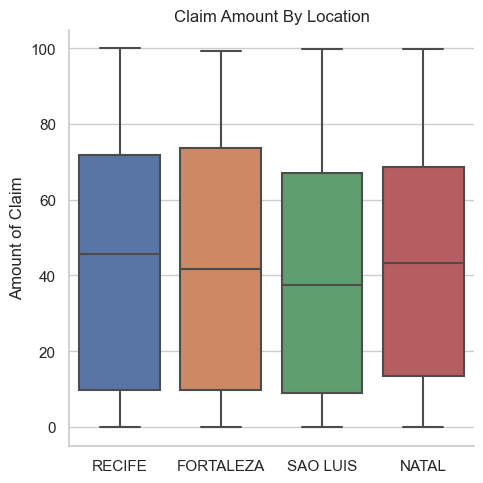

In [38]:
sns.catplot(x='location', 
            y='claim_amount',
            data=food,
            kind='box',
            sym='')

plt.title("Claim Amount By Location")
plt.ylabel("Amount of Claim")
plt.xlabel("")

plt.show()

## Task 3

#### Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.

Time to close for all claims tends to take around 160-180 days and seems to be consistent across all 4 locations.




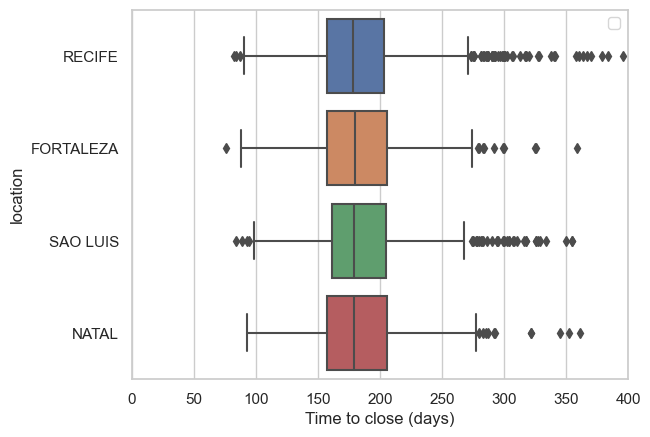

In [39]:
sns.boxplot(data=food, x="time_to_close", y="location")
plt.title("")
plt.xlabel("Time to close (days)")
plt.xlim(0, 400)
plt.legend("")
plt.show()